In [1]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

# 실습용 데이터 패키지
from sklearn.datasets import load_breast_cancer, load_boston

# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
from sklearn.model_selection import KFold

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [2]:
# 데이터 로드 
cereals =pd.read_excel('Cereals.xls', sheet_name=1)

# [2] Cereals

In [3]:
cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [4]:
print(f'관측치 수 : {cereals.shape[0]} \n변수 수 : {cereals.shape[1]}')

관측치 수 : 77 
변수 수 : 16


In [5]:
cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [6]:
# 데이터 다른 시트에서 carbo, sugars -1로 표기,  potass는 누락값 그냥 다 제거하는거 옳을듯
cereals.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [7]:
cereals = cereals.dropna(axis=0)

In [8]:
# shelf는 선반의 몇층에 전시되었는가. 범주형인데 사실 순서가 중요하니 그대로 두어도 될듯하다.
#cereals['shelf'] = cereals['shelf'].astype(object)

In [9]:
cereals.nunique()

name        74
mfr          7
type         2
calories    11
protein      5
fat          5
sodium      26
fiber       12
carbo       21
sugars      16
potass      35
vitamins     3
shelf        3
weight       7
cups        12
rating      74
dtype: int64

# 누락 데이터제외 후 74개의 데이터 중 name 는 74개의 유니크 값. 즉 모두 다른 제품명 = 분석에 필요하지 않음

In [10]:
cereals=cereals.drop('name',axis=1)

In [11]:
target = ['rating']
print(target)
category_feature = [col for col in cereals.columns if cereals[col].dtype == "object"]
print(category_feature)

numeric_feature = list(set(cereals.columns) - set(target)-set(category_feature))
print(numeric_feature)

['rating']
['mfr', 'type']
['fiber', 'protein', 'fat', 'cups', 'weight', 'vitamins', 'calories', 'sugars', 'shelf', 'potass', 'carbo', 'sodium']


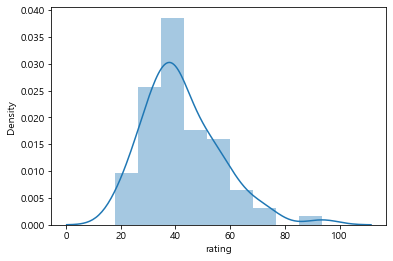

In [12]:
f = sns.distplot(cereals['rating'])

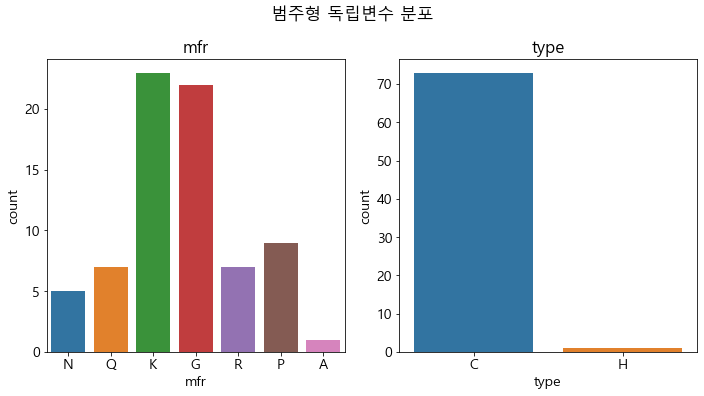

In [13]:
#범주형 종속변수 확인
fig = plt.figure(figsize=(10,10))
plt.rc('font', size=14)
fig.suptitle('범주형 독립변수 분포')

for i in range(len(category_feature)):
    ax = fig.add_subplot(2,2,i+1)
    ax = sns.countplot(cereals[category_feature[i]])
    plt.title(category_feature[i])
fig.tight_layout()
plt.show()

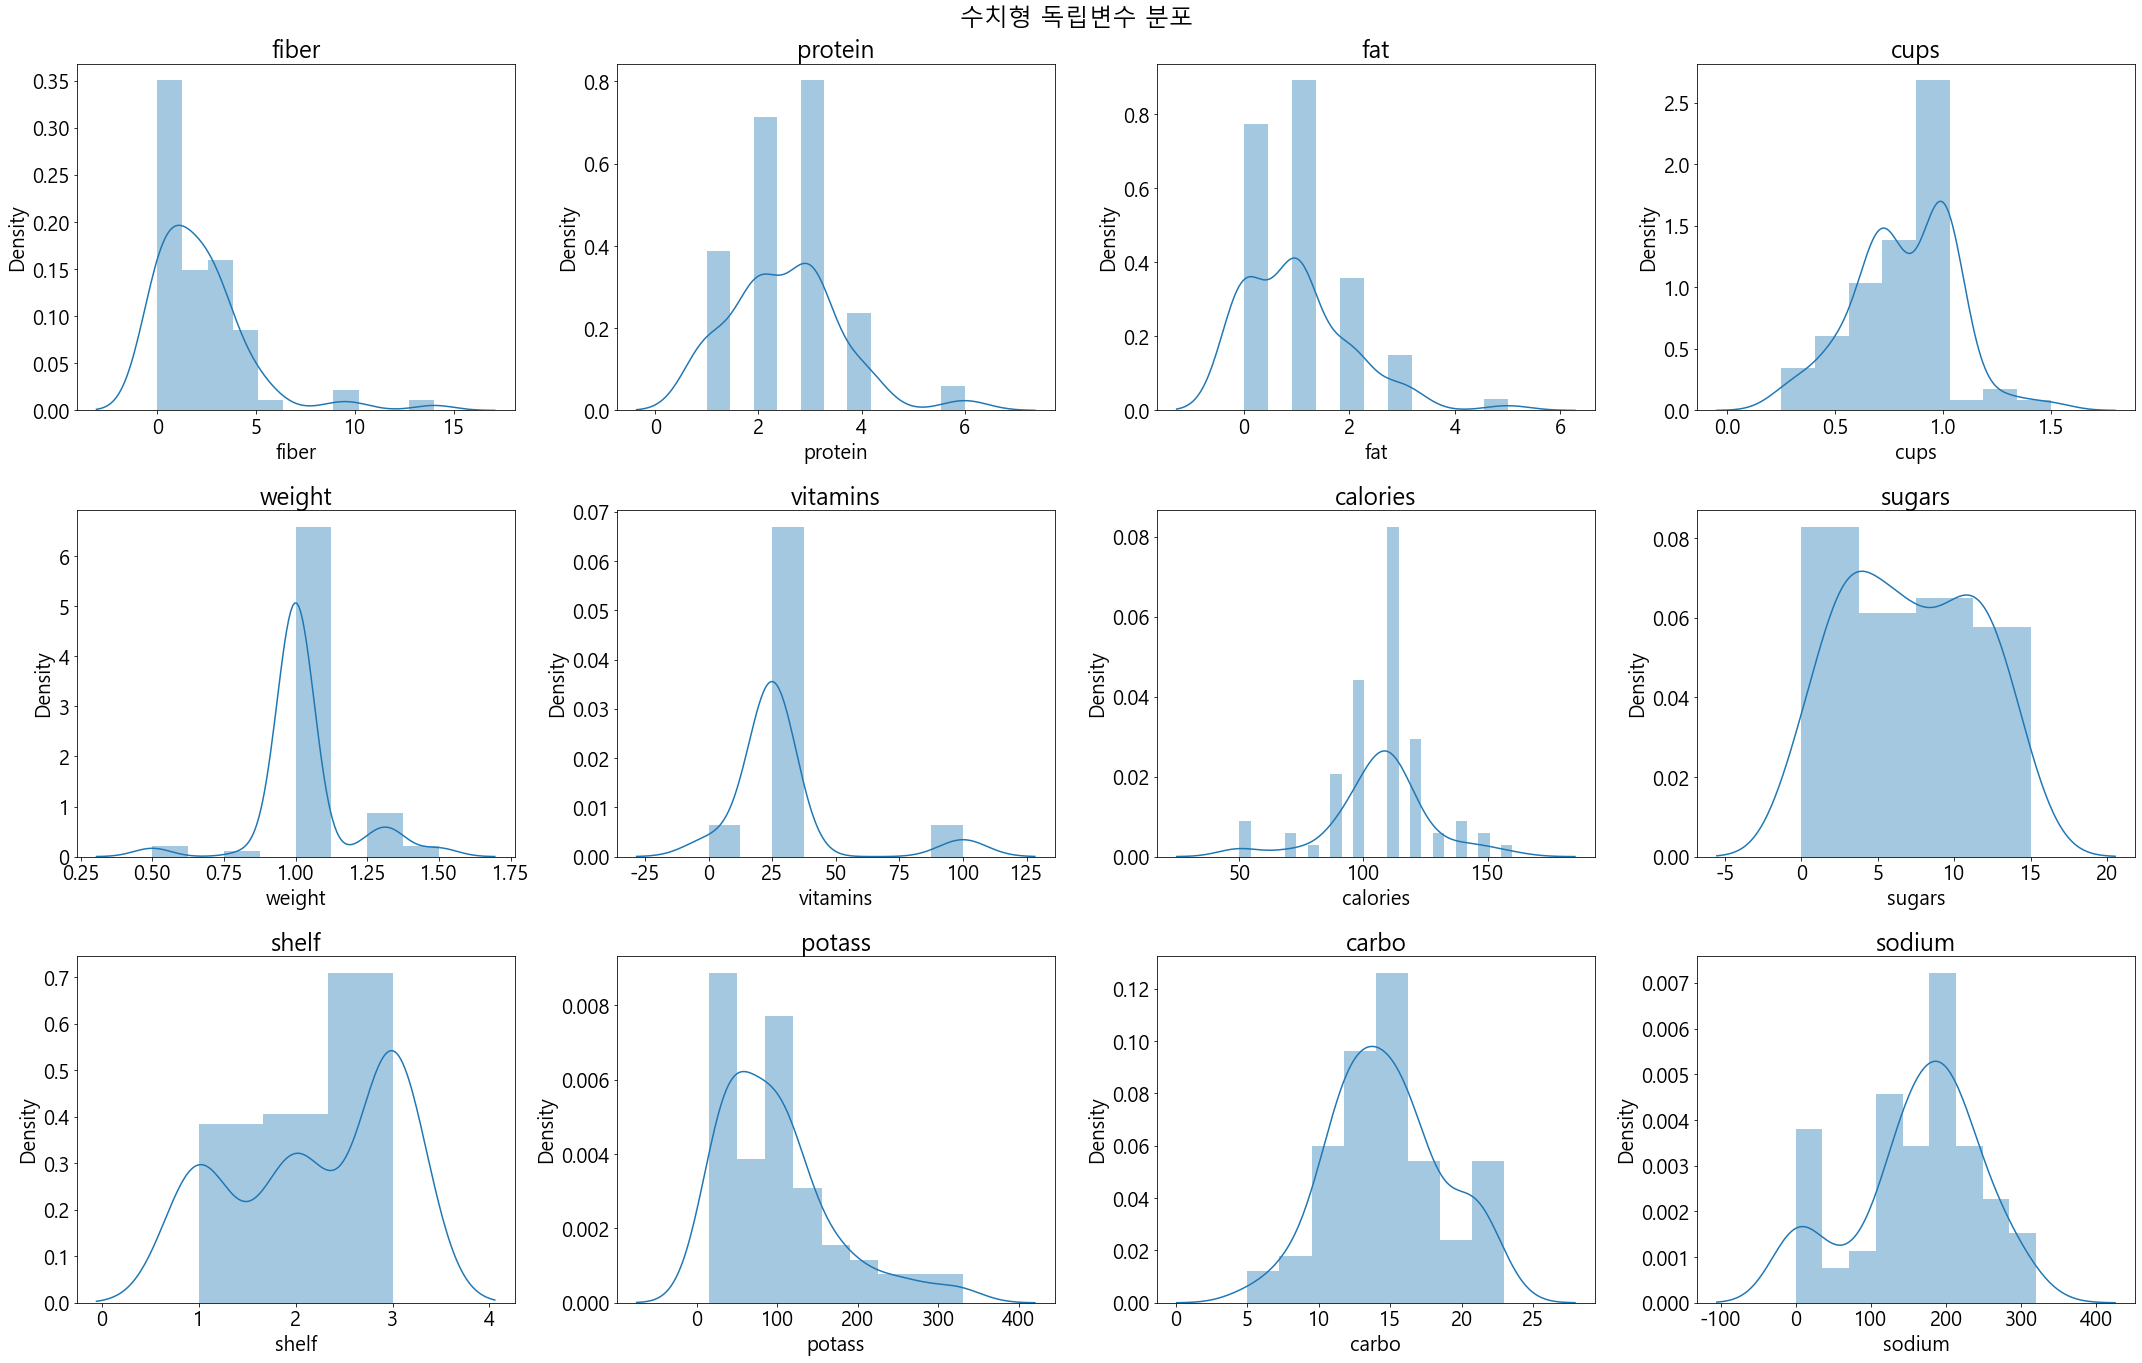

In [14]:
fig = plt.figure(figsize=(30,25))
plt.rc('font', size=20)
fig.suptitle('수치형 독립변수 분포')

for i in range(len(numeric_feature)):
    ax = fig.add_subplot(4,4,i+1)
    ax = sns.distplot(cereals[numeric_feature[i]])
    plt.title(numeric_feature[i])
fig.tight_layout()
plt.show()

<AxesSubplot:>

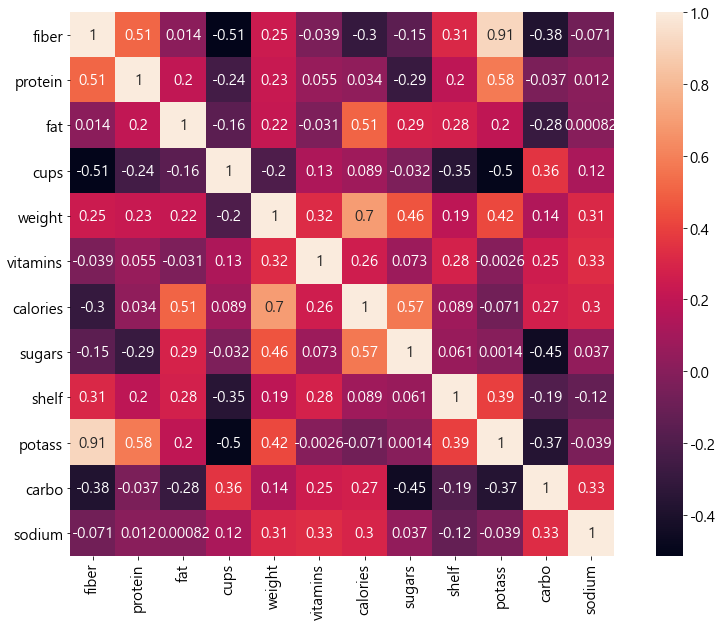

In [15]:
#상관관계분석 피어슨 이용
plt.figure(figsize=(15,10))
plt.rc('font', size=15)
sns.heatmap(cereals[numeric_feature].corr(),annot=True,square = True, annot_kws={'size' : 15})


In [16]:
X = cereals.drop('rating', axis=1)
y = pd.DataFrame(cereals['rating'])
X

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33
1,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00
2,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33
3,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50
5,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75
73,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00
74,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67
75,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00


In [17]:
y

,rating
0,68.402973
1,33.983679
2,59.425505
3,93.704912
5,29.509541
...,...
72,39.106174
73,27.753301
74,49.787445
75,51.592193


In [18]:
X=pd.get_dummies(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 76
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calories  74 non-null     int64  
 1   protein   74 non-null     int64  
 2   fat       74 non-null     int64  
 3   sodium    74 non-null     int64  
 4   fiber     74 non-null     float64
 5   carbo     74 non-null     float64
 6   sugars    74 non-null     float64
 7   potass    74 non-null     float64
 8   vitamins  74 non-null     int64  
 9   shelf     74 non-null     int64  
 10  weight    74 non-null     float64
 11  cups      74 non-null     float64
 12  mfr_A     74 non-null     uint8  
 13  mfr_G     74 non-null     uint8  
 14  mfr_K     74 non-null     uint8  
 15  mfr_N     74 non-null     uint8  
 16  mfr_P     74 non-null     uint8  
 17  mfr_Q     74 non-null     uint8  
 18  mfr_R     74 non-null     uint8  
 19  type_C    74 non-null     uint8  
 20  type_H    74 non-null     uint8  


In [19]:
# Train set/ Test set 나누기 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

Train set dimension is (59, 21)
Test set dimension is (15, 21)


## 단순모델링

In [20]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [21]:
rfr = RandomForestRegressor(n_estimators=10,random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [22]:
# Train set에 대한 성능
y_train_pred = rfr.predict(X_train)

train_r2score = r2_score(y_true = y_train, y_pred =y_train_pred) ## R-squared score
train_mse = mean_squared_error(y_true = y_train, y_pred =y_train_pred) ## MSE (Mean Squared Error)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_true = y_train, y_pred =y_train_pred) ## MAE (Mean Absolute Error)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

print("Train set에 대한 성능")  
print(f"R2 score:{train_r2score:0.4f}",f"MSE:{train_mse:0.4f}",f"MAE:{train_mae:0.4f}", sep='  |  ')  
print(f'Training RMSE: {train_rmse:.3f}')
print(f'Training MAPE: {train_mape:.3f}')

# Test set에 대한 성능
y_test_pred = rfr.predict(X_test)

test_r2score = r2_score(y_true = y_test, y_pred =y_test_pred) ## R-squared score
test_mse = mean_squared_error(y_true = y_test, y_pred =y_test_pred) ## MSE (Mean Squared Error)
test_rmse= np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_true = y_test, y_pred =y_test_pred) ## MAE (Mean Absolute Error)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print("\n")  
print("Test set에 대한 성능")  
print(f"R2 score:{test_r2score:0.4f}",f"MSE:{test_mse:0.4f}",f"MAE:{test_mae:0.4f}", sep='  |  ')  
print(f'Testing RMSE: {test_rmse:.3f}')
print(f'Testing MAPE: {test_mape:.3f}')


Train set에 대한 성능
R2 score:0.9518  |  MSE:9.8100  |  MAE:1.8117
Training RMSE: 3.132
Training MAPE: 37.686


Test set에 대한 성능
R2 score:0.7284  |  MSE:41.7696  |  MAE:5.0204
Testing RMSE: 6.463
Testing MAPE: 33.616


### 4.2 단일 하이퍼 파라미터에 대한 Grid search -n_estimator

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:51<00:00,  1.02s/it]


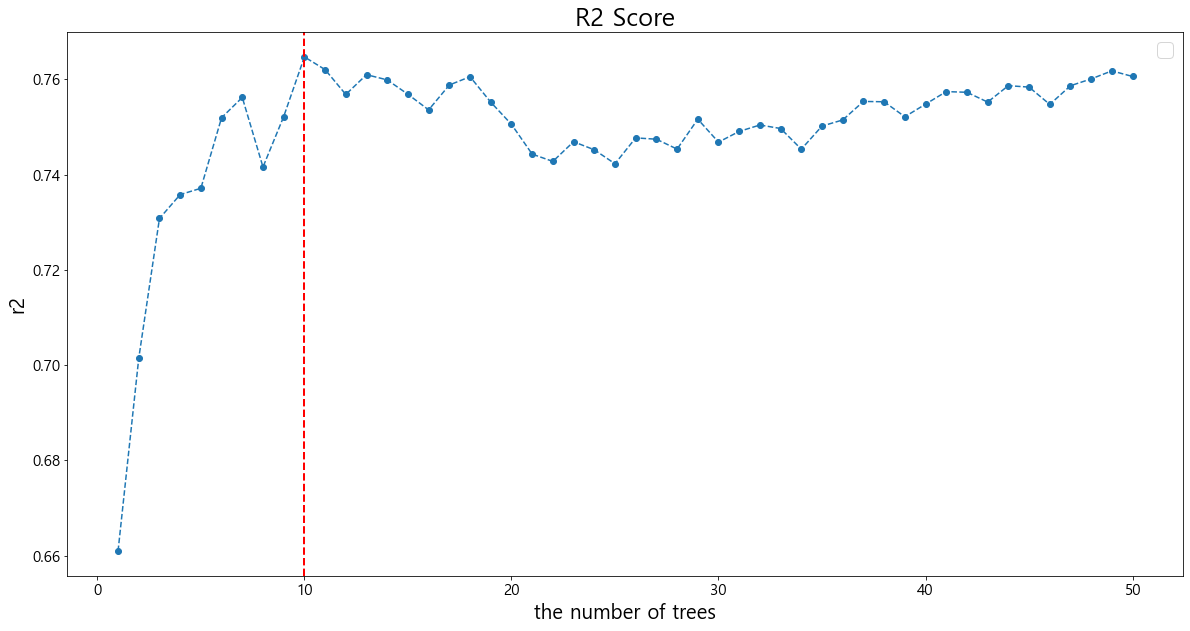

In [23]:
cv_scores = []
estimator_list =[i for i in range(1,51,1)]
for i in tqdm(range(0,50,1)):
    rfr = RandomForestRegressor(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=42)
    score = cross_val_score(rfr, X_train, y_train, cv=10, scoring = 'r2').mean()
    cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list,cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the number of trees", fontsize=20 )
plt.ylabel("r2", fontsize=20)
plt.title("R2 Score", fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [24]:
print(f"최적의 tree개수:{(cv_scores.index(max(cv_scores)))+1}")
print("\n")  
print("Train set에 대한 성능 (10 fold cross validation)")  
print(f"R2:{max(cv_scores):0.4f}")  

최적의 tree개수:10


Train set에 대한 성능 (10 fold cross validation)
R2:0.7647


In [25]:
opti_n_estimators=(cv_scores.index(max(cv_scores)))+1

rfr = RandomForestRegressor(n_estimators=opti_n_estimators, n_jobs=-1, random_state=42)
rfr.fit(X_train, y_train)

# Train set에 대한 성능
y_train_pred = rfr.predict(X_train)

train_r2score = r2_score(y_true = y_train, y_pred =y_train_pred) ## R-squared score
train_mse = mean_squared_error(y_true = y_train, y_pred =y_train_pred) ## MSE (Mean Squared Error)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_true = y_train, y_pred =y_train_pred) ## MAE (Mean Absolute Error)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

print("Train set에 대한 성능")  
print(f"R2 score:{train_r2score:0.4f}",f"MSE:{train_mse:0.4f}",f"MAE:{train_mae:0.4f}", sep='  |  ')  
print(f'Training RMSE: {train_rmse:.3f}')
print(f'Training MAPE: {train_mape:.3f}')

# Test set에 대한 성능
y_test_pred = rfr.predict(X_test)

test_r2score = r2_score(y_true = y_test, y_pred =y_test_pred) ## R-squared score
test_mse = mean_squared_error(y_true = y_test, y_pred =y_test_pred) ## MSE (Mean Squared Error)
test_rmse= np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_true = y_test, y_pred =y_test_pred) ## MAE (Mean Absolute Error)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print("\n")  
print("Test set에 대한 성능")  
print(f"R2 score:{test_r2score:0.4f}",f"MSE:{test_mse:0.4f}",f"MAE:{test_mae:0.4f}", sep='  |  ')  
print(f'Testing RMSE: {test_rmse:.3f}')
print(f'Testing MAPE: {test_mape:.3f}')

Train set에 대한 성능
R2 score:0.9518  |  MSE:9.8100  |  MAE:1.8117
Training RMSE: 3.132
Training MAPE: 37.686


Test set에 대한 성능
R2 score:0.7284  |  MSE:41.7696  |  MAE:5.0204
Testing RMSE: 6.463
Testing MAPE: 33.616


## training은 성능 좋으나 testing는 낮음,  다른 파라미터가 부족하다는 의미로 해석가능

# 단일- max_depth

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:36<00:00,  1.20s/it]


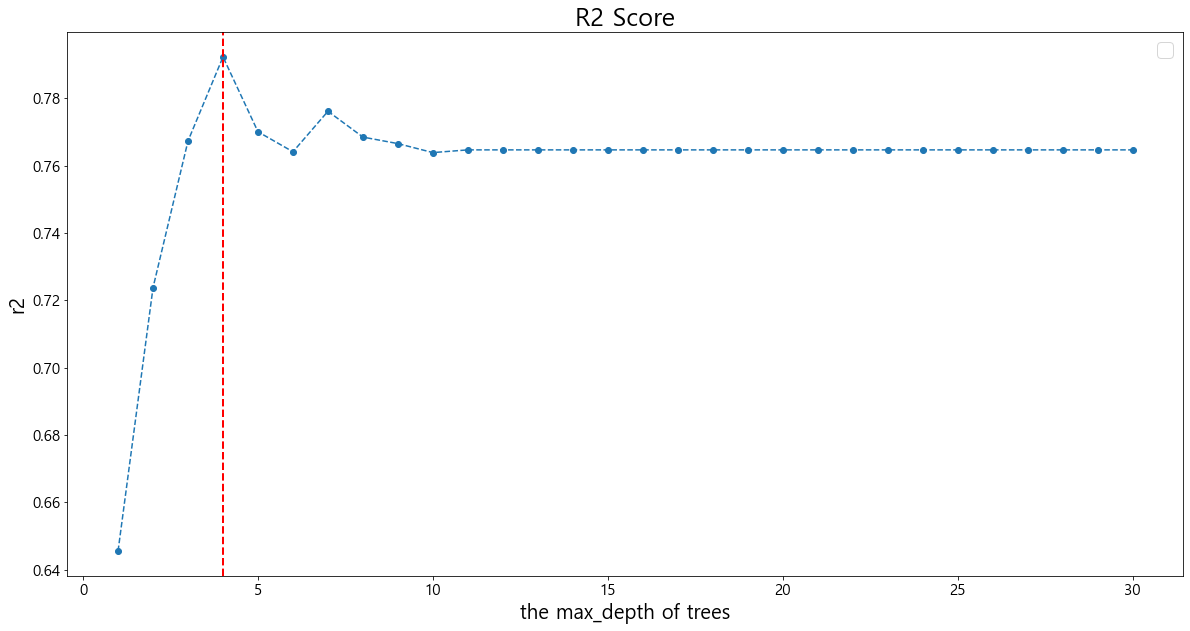

In [26]:
cv_scores = []
estimator_list =[i for i in range(1,31,1)]
for i in tqdm(range(0,30,1)):
    rfr = RandomForestRegressor(n_estimators=10,
                                 max_depth=i+1,
                                 n_jobs=-1,
                                 random_state=42)
    score = cross_val_score(rfr, X_train, y_train, cv=10, scoring = 'r2').mean()
    cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list,cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the max_depth of trees", fontsize=20 )
plt.ylabel("r2", fontsize=20)
plt.title("R2 Score", fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [27]:
print(f"최적의 max_depth:{(cv_scores.index(max(cv_scores)))+1}")
print("\n")  
print("Train set에 대한 성능 (10 fold cross validation)")  
print(f"r2:{max(cv_scores):0.4f}")  

최적의 max_depth:4


Train set에 대한 성능 (10 fold cross validation)
r2:0.7923


In [28]:
rfr = RandomForestRegressor(n_estimators=10,max_depth=4, n_jobs=-1, random_state=42)
rfr.fit(X_train, y_train)

# Train set에 대한 성능
y_train_pred = rfr.predict(X_train)

train_r2score = r2_score(y_true = y_train, y_pred =y_train_pred) ## R-squared score
train_mse = mean_squared_error(y_true = y_train, y_pred =y_train_pred) ## MSE (Mean Squared Error)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_true = y_train, y_pred =y_train_pred) ## MAE (Mean Absolute Error)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

print("Train set에 대한 성능")  
print(f"R2 score:{train_r2score:0.4f}",f"MSE:{train_mse:0.4f}",f"MAE:{train_mae:0.4f}", sep='  |  ')  
print(f'Training RMSE: {train_rmse:.3f}')
print(f'Training MAPE: {train_mape:.3f}')

# Test set에 대한 성능
y_test_pred = rfr.predict(X_test)

test_r2score = r2_score(y_true = y_test, y_pred =y_test_pred) ## R-squared score
test_mse = mean_squared_error(y_true = y_test, y_pred =y_test_pred) ## MSE (Mean Squared Error)
test_rmse= np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_true = y_test, y_pred =y_test_pred) ## MAE (Mean Absolute Error)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print("\n")  
print("Test set에 대한 성능")  
print(f"R2 score:{test_r2score:0.4f}",f"MSE:{test_mse:0.4f}",f"MAE:{test_mae:0.4f}", sep='  |  ')  
print(f'Testing RMSE: {test_rmse:.3f}')
print(f'Testing MAPE: {test_mape:.3f}') 

Train set에 대한 성능
R2 score:0.9417  |  MSE:11.8518  |  MAE:2.2074
Training RMSE: 3.443
Training MAPE: 37.395


Test set에 대한 성능
R2 score:0.6800  |  MSE:49.2058  |  MAE:5.2842
Testing RMSE: 7.015
Testing MAPE: 33.632


# 단일 - max_leaf_nodes

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:15<00:00,  1.88it/s]


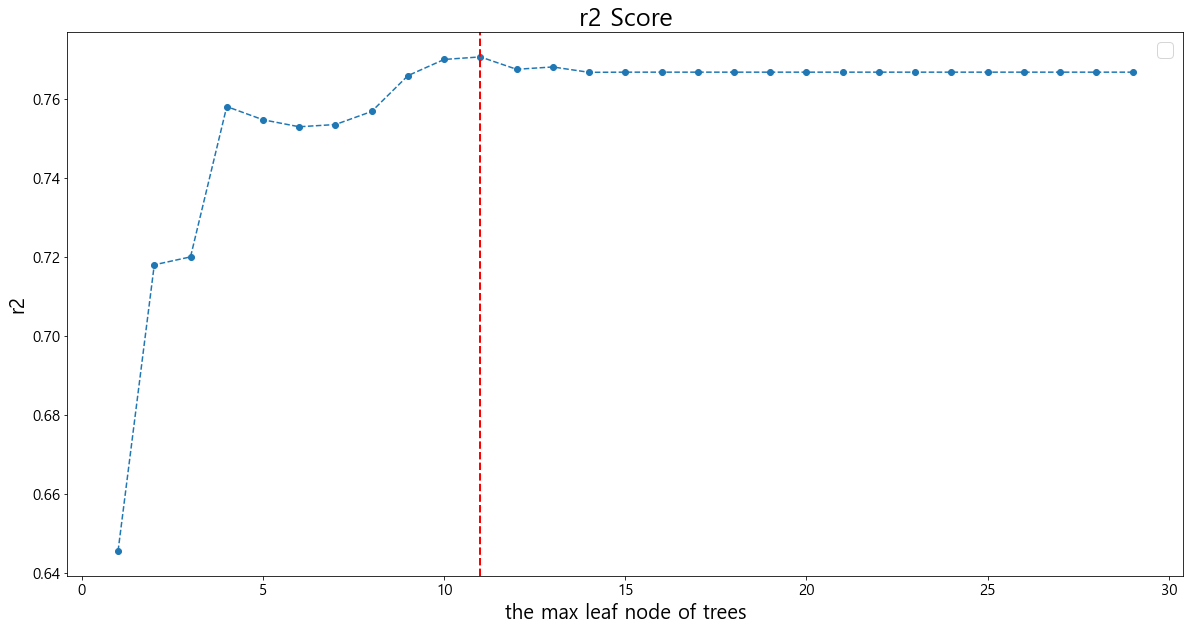

In [29]:
cv_scores = []
estimator_list =[i for i in range(1,30,1)]
for i in tqdm(range(1,30,1)):
    rfr = RandomForestRegressor(n_estimators=10,
                                 max_depth=4,
                                 max_leaf_nodes=i+1,
                                 n_jobs=-1,
                                 random_state=42)
    score = cross_val_score(rfr, X_train, y_train, cv=10, scoring = 'r2').mean()
    cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list,cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the max leaf node of trees", fontsize=20 )
plt.ylabel("r2", fontsize=20)
plt.title("r2 Score", fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [30]:
print(f"최적의 max_leaf_nodes:{estimator_list[cv_scores.index(max(cv_scores))]}")
print("\n")  
print("Train set에 대한 성능 (10 fold cross validation)")  
print(f"r2:{max(cv_scores):0.4f}")  

최적의 max_leaf_nodes:11


Train set에 대한 성능 (10 fold cross validation)
r2:0.7706


In [31]:
best_rfr = RandomForestRegressor(n_estimators=10,
                                 max_depth=4,
                                 max_leaf_nodes=11,
                                 n_jobs=-1,
                                 random_state=42)
best_rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_leaf_nodes=11, n_estimators=10,
                      n_jobs=-1, random_state=42)

In [32]:
# Train set에 대한 성능
y_train_pred = best_rfr.predict(X_train)

train_r2score = r2_score(y_true = y_train, y_pred =y_train_pred) ## R-squared score
train_mse = mean_squared_error(y_true = y_train, y_pred =y_train_pred) ## MSE (Mean Squared Error)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_true = y_train, y_pred =y_train_pred) ## MAE (Mean Absolute Error)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

print("Train set에 대한 성능")  
print(f"R2 score:{train_r2score:0.4f}",f"MSE:{train_mse:0.4f}",f"MAE:{train_mae:0.4f}", sep='  |  ')  
print(f'Training RMSE: {train_rmse:.3f}')
print(f'Training MAPE: {train_mape:.3f}')

# Test set에 대한 성능
y_test_pred = best_rfr.predict(X_test)

test_r2score = r2_score(y_true = y_test, y_pred =y_test_pred) ## R-squared score
test_mse = mean_squared_error(y_true = y_test, y_pred =y_test_pred) ## MSE (Mean Squared Error)
test_rmse= np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_true = y_test, y_pred =y_test_pred) ## MAE (Mean Absolute Error)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print("\n")  
print("Test set에 대한 성능")  
print(f"R2 score:{test_r2score:0.4f}",f"MSE:{test_mse:0.4f}",f"MAE:{test_mae:0.4f}", sep='  |  ')  
print(f'Testing RMSE: {test_rmse:.3f}')
print(f'Testing MAPE: {test_mape:.3f}') 

Train set에 대한 성능
R2 score:0.9367  |  MSE:12.8843  |  MAE:2.3082
Training RMSE: 3.589
Training MAPE: 37.470


Test set에 대한 성능
R2 score:0.7077  |  MSE:44.9467  |  MAE:5.2346
Testing RMSE: 6.704
Testing MAPE: 33.422


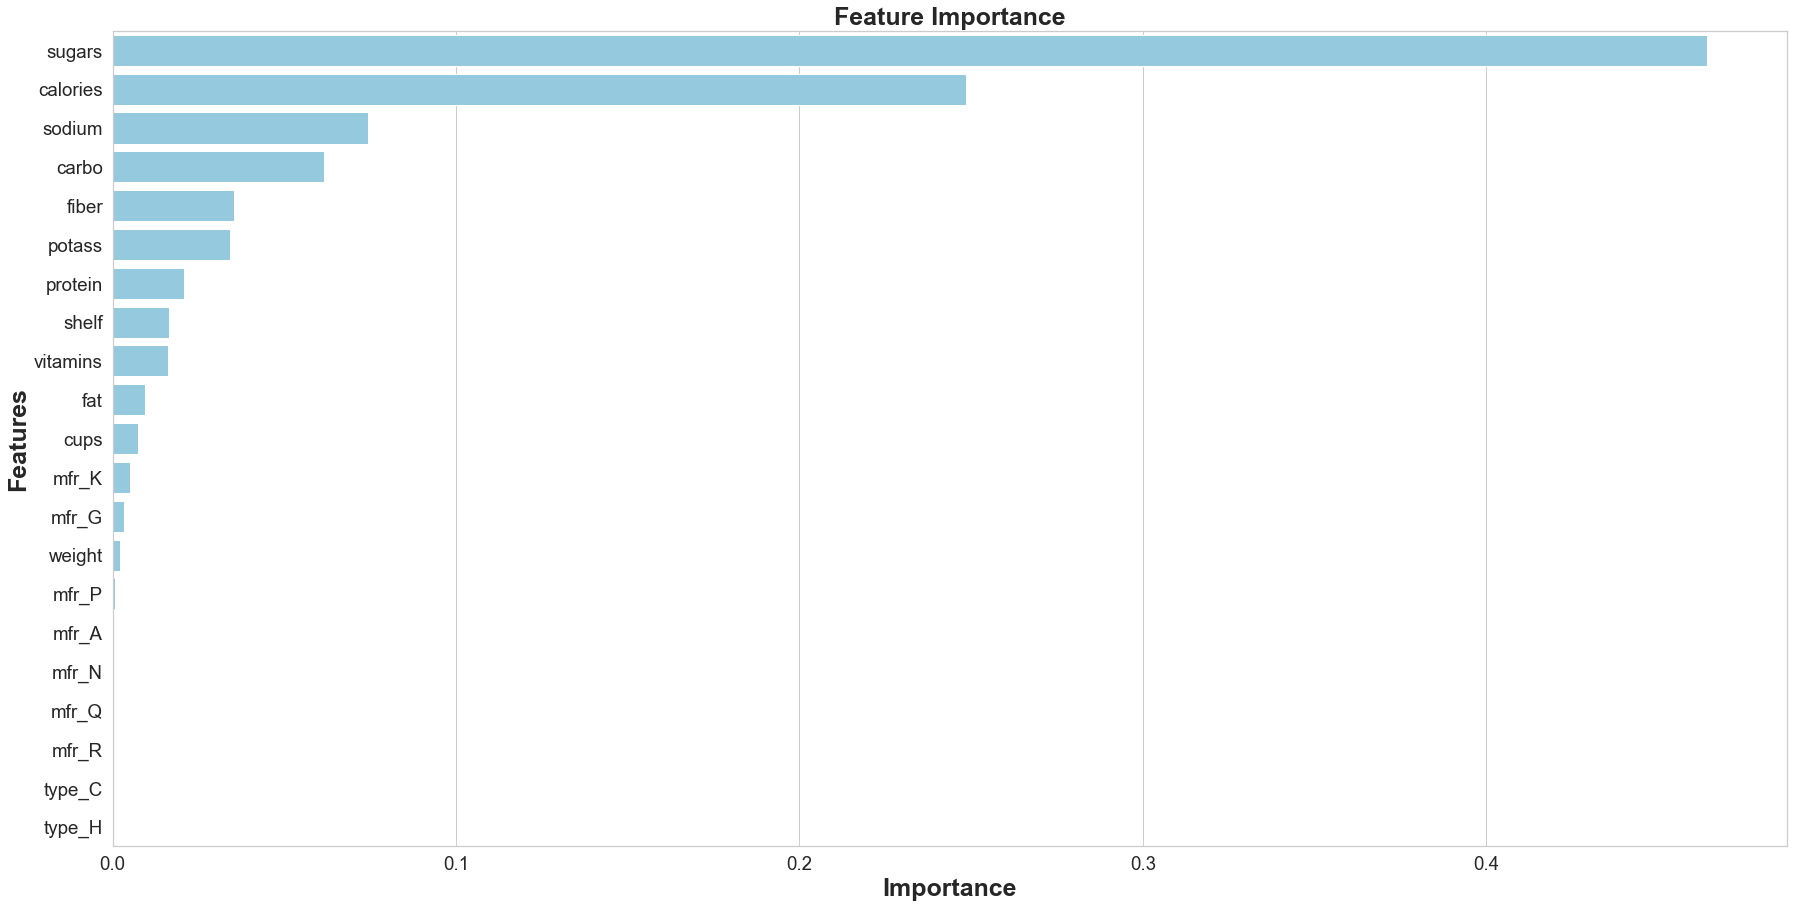

None

,Features,Gini-Importance
0,sugars,0.464233
1,calories,0.248550
2,sodium,0.074417
3,carbo,0.061544
4,fiber,0.035489
5,potass,0.034068
6,protein,0.020883
7,shelf,0.016572
8,vitamins,0.016144
9,fat,0.009365


In [33]:
feats = {}
for feature, importance in zip(X_train.columns.tolist(), best_rfr.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [34]:
from catboost import CatBoostRegressor
from sklearn.ensemble import  AdaBoostRegressor


In [35]:
# 데이터 컬럼 단위 정규화 하기 
normalizer = StandardScaler()
X_train_scaled = normalizer.fit_transform(X_train)
X_test_scaled = normalizer.transform(X_test)

In [36]:
## 탐색하고자 하는 하이퍼파라미터 설정 ## 
model_params = {               
                'Catboost' : {'model' : CatBoostRegressor(random_seed=0, silent=True), 
                              'params' : {'max_depth':[i for i in range(1,11,2)] ,
                                          'n_estimators':[50*(i+1) for i in range(3)],
                                          'learning_rate': [0.1*(i+1) for i in range(3)]
                                     }}
                                    }
               

In [37]:
pbar = tqdm(total=len(model_params)) # tqdm은 학습 상태가 어느정도 됬는지 파악해주는데 유용한 함수입니다.
output = pd.DataFrame([])

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

In [38]:
for model_name, v in model_params.items():

        pbar.set_description(desc=f"{model_name}") # tqdm에서 활용되는 옵션입니다. 현재 학습되고 있는 모델 이름을 출력합니다.
        
        model, params = v['model'], v['params']
        gcv = GridSearchCV(estimator=model, param_grid=params, n_jobs=2 if model_name == 'Catboost' else 5, cv=5, scoring='r2')
        gcv.fit(X_train_scaled, y_train)
        
        result = pd.DataFrame.from_dict(gcv.cv_results_) # cv_results에는 각 fold별 예측 성능이 기록되어 있습니다.
        result['test_r2_with_best_hyp'] = r2_score(y_pred = gcv.predict(X_test_scaled) , y_true = y_test) #gcv.predict()는 최적 하이퍼파라미터가 탑재된 모델의 예측 결과를 파악하는데 사용됩니다.
        result['model_name'] = model_name
        result['seed'] = 0
        output = pd.concat([output,result])
        pbar.update(1)

output.reset_index(drop=True)       
output.to_csv('./classification_result_cereal.csv')

Catboost: 100%|██████████████████████████████████████████████████████████████████████████| 1/1 [00:34<00:00, 34.24s/it]

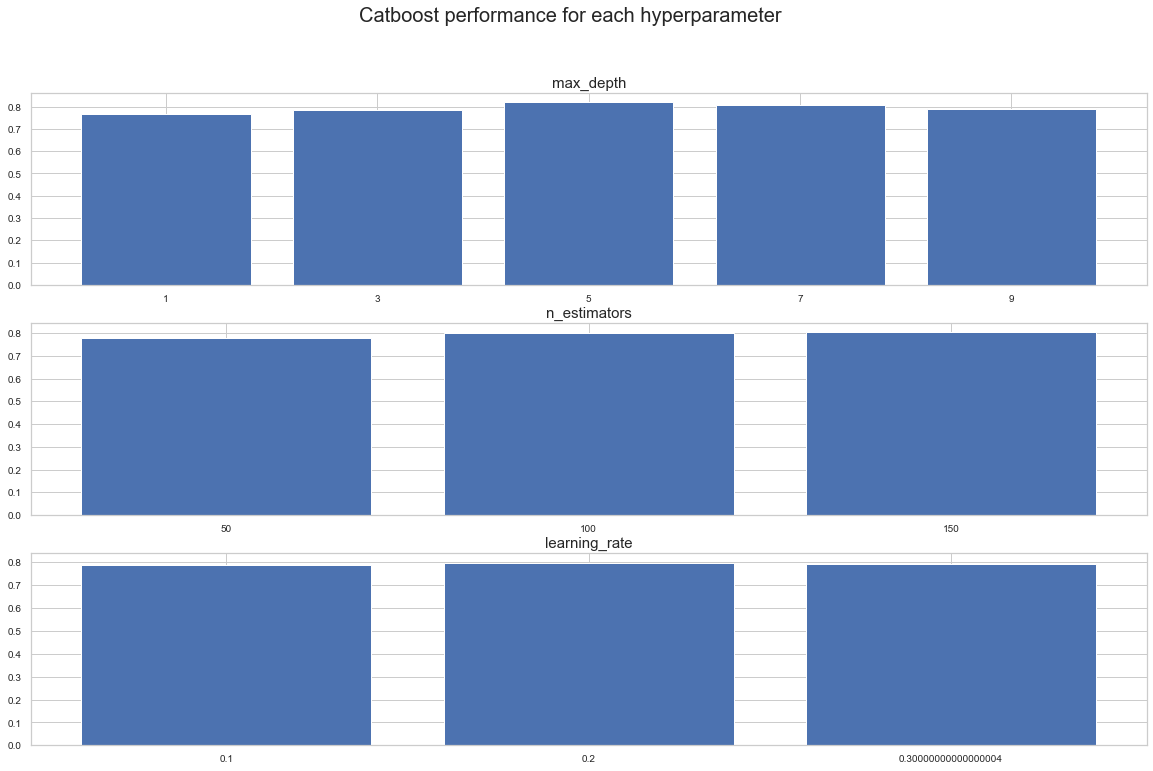

In [39]:
model_name = 'Catboost' # GBM , AdaBoost, Light GBM, Catboost 궁금한거 로 바꿔서 실행

for_plot_values = output.loc[ output['model_name'] == model_name,:] # 예측 모델별 결과 확인을 위한 indexing

fig , axs = plt.subplots(nrows=model_params[model_name]['params'].keys().__len__(), ncols=1, figsize=(20,12)) # plot configure
fig.suptitle(f'{model_name} performance for each hyperparameter',fontsize=20) # 전체 Plot 제목

for ind , param_key in enumerate(model_params[model_name]['params'].keys()):
    
    param_for_plot = for_plot_values.groupby([f'param_{param_key}'])['mean_test_score'].mean() # 조절 하이퍼파라미터 이외에 대해서는 평균 성능 (개략적)
    
    axs[ind].bar(height = param_for_plot.values,x = [i for i in range(param_for_plot.values.shape[0])]) # bar plot 
    axs[ind].tick_params(axis='both',labelsize=10) # x,y 축 글씨 폰트 설정
    
    axs[ind].set_xticks([i for i in range(param_for_plot.values.shape[0])]) # x 축 ticks 설정
    axs[ind].set_xticklabels(param_for_plot.index.to_list()) # x 축 ticks 이름 설정

    axs[ind].set_title(f'{param_key}',fontsize=15) # 내부 plot 제목 

In [40]:
output.reset_index(drop=True,inplace=True) # index 초기화 
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

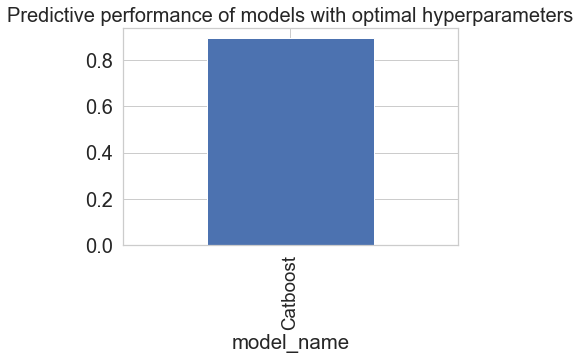

In [41]:
idx = output.groupby(['model_name'])['mean_test_score'].idxmax() # 각 모델별 검증용 accuracy를 기준하여, Best 성능을 기록한 경우 추출
output.loc[idx,['model_name','test_r2_with_best_hyp']].set_index('model_name').plot.bar(legend=False)
plt.title('Predictive performance of models with optimal hyperparameters',fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [42]:
output.loc[idx,['model_name','test_r2_with_best_hyp']]

,model_name,test_r2_with_best_hyp
8,Catboost,0.893191


In [43]:
for_plot_values

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,test_r2_with_best_hyp,model_name,seed
0,0.100932,0.047076,0.005982,0.000891,0.1,1,50,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.795847,0.576886,0.790801,0.658269,0.727022,0.709765,0.083167,45,0.893191,Catboost,0
1,0.087965,0.002555,0.007779,0.001163,0.1,1,100,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.917476,0.665777,0.807312,0.806492,0.637006,0.766813,0.102929,41,0.893191,Catboost,0
2,0.137431,0.014486,0.008577,0.002053,0.1,1,150,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",0.924941,0.703548,0.805452,0.849770,0.608063,0.778355,0.111281,36,0.893191,Catboost,0
3,0.082777,0.006704,0.006583,0.001017,0.1,3,50,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.899624,0.633703,0.730342,0.752272,0.843289,0.771846,0.092326,39,0.893191,Catboost,0
4,0.119081,0.005591,0.005585,0.000797,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.945640,0.682600,0.780419,0.820947,0.758423,0.797606,0.086621,19,0.893191,Catboost,0
5,0.175927,0.014692,0.007780,0.000745,0.1,3,150,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.953767,0.696712,0.799256,0.854169,0.737401,0.808261,0.090361,14,0.893191,Catboost,0
6,0.084772,0.006763,0.005586,0.001017,0.1,5,50,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.921351,0.598823,0.805116,0.779813,0.891413,0.799303,0.113125,17,0.893191,Catboost,0
7,0.265090,0.091462,0.027926,0.022381,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.956307,0.661917,0.851516,0.843165,0.856691,0.833919,0.095370,2,0.893191,Catboost,0
8,0.402525,0.064930,0.021739,0.014025,0.1,5,150,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.963776,0.670388,0.852602,0.859912,0.836018,0.836539,0.094446,1,0.893191,Catboost,0
9,0.166156,0.031643,0.011370,0.004911,0.1,7,50,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.901579,0.580584,0.763059,0.775715,0.853796,0.774947,0.109701,37,0.893191,Catboost,0


In [44]:
cat = CatBoostRegressor(n_estimators=150, max_depth=5, learning_rate=0.2, random_seed=42, silent=True)
cat.fit(X_train, y_train)

In [45]:
# Train set에 대한 성능
y_train_pred = cat.predict(X_train)

train_r2score = r2_score(y_true = y_train, y_pred =y_train_pred) ## R-squared score
train_mse = mean_squared_error(y_true = y_train, y_pred =y_train_pred) ## MSE (Mean Squared Error)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_true = y_train, y_pred =y_train_pred) ## MAE (Mean Absolute Error)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

print("Train set에 대한 성능")  
print(f"R2 score:{train_r2score:0.4f}",f"MSE:{train_mse:0.4f}",f"MAE:{train_mae:0.4f}", sep='  |  ')  
print(f'Training RMSE: {train_rmse:.3f}')
print(f'Training MAPE: {train_mape:.3f}')

# Test set에 대한 성능
y_test_pred = cat.predict(X_test)

test_r2score = r2_score(y_true = y_test, y_pred =y_test_pred) ## R-squared score
test_mse = mean_squared_error(y_true = y_test, y_pred =y_test_pred) ## MSE (Mean Squared Error)
test_rmse= np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_true = y_test, y_pred =y_test_pred) ## MAE (Mean Absolute Error)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print("\n")  
print("Test set에 대한 성능")  
print(f"R2 score:{test_r2score:0.4f}",f"MSE:{test_mse:0.4f}",f"MAE:{test_mae:0.4f}", sep='  |  ')  
print(f'Testing RMSE: {test_rmse:.3f}')
print(f'Testing MAPE: {test_mape:.3f}') 

Train set에 대한 성능
R2 score:0.9999  |  MSE:0.0290  |  MAE:0.1331
Training RMSE: 0.170
Training MAPE: 39.226


Test set에 대한 성능
R2 score:0.8955  |  MSE:16.0702  |  MAE:3.2278
Testing RMSE: 4.009
Testing MAPE: 35.121


In [46]:
ㅊ

NameError: name 'ᄎ' is not defined